In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as datetime

In [62]:
df = pd.read_csv("/Users/kxng/Documents/Python/Myproject/data/restaurant_reviews_dataset.csv")

df.sample(1)

,customer_id,visit_date,age,gender,cuisine_type,restaurant_location,party_size,wait_time,food_quality,service_quality,...,total_spending,recommend,will_return,payment_method,visit_time,day_of_week,is_weekend,response_time,cleanliness,review_text
1240,1241,2023-12-19,53,Male,Japanese,South Jakarta,6,5,3,2,...,1290852,No,No,Debit Card,Breakfast,Tuesday,0,28,3,Food was okay. Poor customer service. Might gi...


In [63]:
df.info()

print('Shape :\t{}'.format(df.shape))
print('Duplicated : {}'.format(df.duplicated().sum()))
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1500 non-null   int64  
 1   visit_date           1500 non-null   object 
 2   age                  1500 non-null   int64  
 3   gender               1500 non-null   object 
 4   cuisine_type         1500 non-null   object 
 5   restaurant_location  1500 non-null   object 
 6   party_size           1500 non-null   int64  
 7   wait_time            1500 non-null   int64  
 8   food_quality         1500 non-null   int64  
 9   service_quality      1500 non-null   int64  
 10  ambiance_rating      1500 non-null   int64  
 11  price_value          1500 non-null   int64  
 12  overall_rating       1500 non-null   float64
 13  spending_per_person  1500 non-null   int64  
 14  total_spending       1500 non-null   int64  
 15  recommend            1500 non-null   o

customer_id            0
visit_date             0
age                    0
gender                 0
cuisine_type           0
restaurant_location    0
party_size             0
wait_time              0
food_quality           0
service_quality        0
ambiance_rating        0
price_value            0
overall_rating         0
spending_per_person    0
total_spending         0
recommend              0
will_return            0
payment_method         0
visit_time             0
day_of_week            0
is_weekend             0
response_time          0
cleanliness            0
review_text            0
dtype: int64

In [64]:
df['visit_date'] = pd.to_datetime(df.visit_date)
df.dtypes

customer_id                     int64
visit_date             datetime64[ns]
age                             int64
gender                         object
cuisine_type                   object
restaurant_location            object
party_size                      int64
wait_time                       int64
food_quality                    int64
service_quality                 int64
ambiance_rating                 int64
price_value                     int64
overall_rating                float64
spending_per_person             int64
total_spending                  int64
recommend                      object
will_return                    object
payment_method                 object
visit_time                     object
day_of_week                    object
is_weekend                      int64
response_time                   int64
cleanliness                     int64
review_text                    object
dtype: object

In [65]:
df['visit_Year']=df['visit_date'].dt.year
df['visit_Month']=df['visit_date'].dt.month_name()
df['visit_Day']=df['visit_date'].dt.day



In [66]:
df.head(10)

,customer_id,visit_date,age,gender,cuisine_type,restaurant_location,party_size,wait_time,food_quality,service_quality,...,payment_method,visit_time,day_of_week,is_weekend,response_time,cleanliness,review_text,visit_Year,visit_Month,visit_Day
0,1,2025-02-17,58,Male,Italian,North Jakarta,4,19,4,2,...,Credit Card,Breakfast,Monday,0,5,3,Fresh ingredients and perfect seasoning. Poor ...,2025,February,17
1,2,2023-11-26,31,Male,Western,Central Jakarta,4,50,4,5,...,Credit Card,Dinner,Sunday,1,13,3,"Amazing Western cuisine, authentic flavors! Gr...",2023,November,26
2,3,2024-05-27,31,Female,Japanese,South Jakarta,7,11,4,5,...,E-Wallet,Late Night,Monday,0,7,5,Fresh ingredients and perfect seasoning. Servi...,2024,May,27
3,4,2024-04-19,36,Female,Arabic,East Jakarta,2,7,3,2,...,Cash,Dinner,Friday,0,10,4,Food was okay. Poor customer service. Might gi...,2024,April,19
4,5,2025-04-29,40,Male,Vietnamese,North Jakarta,2,43,4,4,...,E-Wallet,Lunch,Tuesday,0,26,4,Best Vietnamese I've had in a long time! Staff...,2025,April,29
5,6,2025-03-16,21,Male,Italian,Bekasi,7,22,1,3,...,E-Wallet,Late Night,Sunday,1,9,4,Not authentic at all. Service was acceptable. ...,2025,March,16
6,7,2025-08-21,26,Male,Western,North Jakarta,7,42,5,4,...,Credit Card,Lunch,Thursday,0,25,3,The Western food was absolutely delicious! Ser...,2025,August,21
7,8,2024-01-10,61,Female,Arabic,South Jakarta,7,29,5,5,...,Credit Card,Dinner,Wednesday,0,8,4,Fresh ingredients and perfect seasoning. Serve...,2024,January,10
8,9,2024-09-11,45,Male,Korean,Central Jakarta,5,37,4,2,...,QRIS,Lunch,Wednesday,0,16,3,Fresh ingredients and perfect seasoning. Staff...,2024,September,11
9,10,2023-11-29,52,Male,Arabic,Bekasi,8,6,2,2,...,QRIS,Late Night,Wednesday,0,7,5,The Arabic was disappointing. Service was slow...,2023,November,29


In [67]:
df.columns

Index(['customer_id', 'visit_date', 'age', 'gender', 'cuisine_type',
       'restaurant_location', 'party_size', 'wait_time', 'food_quality',
       'service_quality', 'ambiance_rating', 'price_value', 'overall_rating',
       'spending_per_person', 'total_spending', 'recommend', 'will_return',
       'payment_method', 'visit_time', 'day_of_week', 'is_weekend',
       'response_time', 'cleanliness', 'review_text', 'visit_Year',
       'visit_Month', 'visit_Day'],
      dtype='object')

In [68]:
cash_counts=df.payment_method.value_counts()
print(cash_counts)

payment_method
Debit Card     343
E-Wallet       314
Credit Card    304
QRIS           271
Cash           268
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Payments by Cash Type')

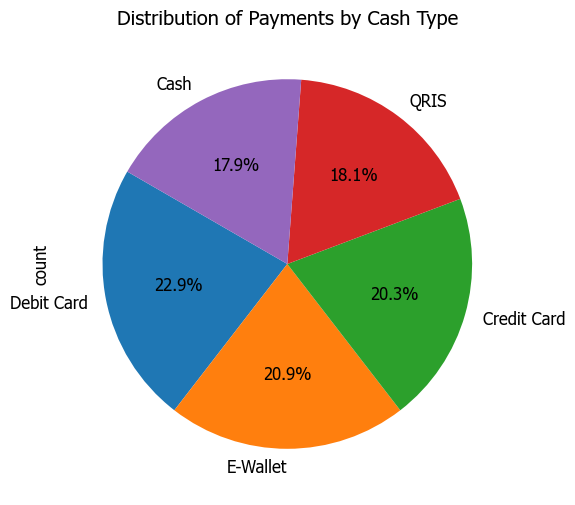

In [69]:
plt.figure(figsize=(8,6))
cash_counts.plot.pie(autopct='%1.1f%%',startangle=150)
plt.title('Distribution of Payments by Cash Type')

In [70]:
cuisine_counts=df.cuisine_type.value_counts()
print(cuisine_counts)

cuisine_type
Western       150
Thai          143
Italian       142
Mexican       141
Arabic        137
Vietnamese    134
Korean        134
Chinese       131
Indonesian    130
Japanese      129
Indian        129
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution Cuisine Sales')

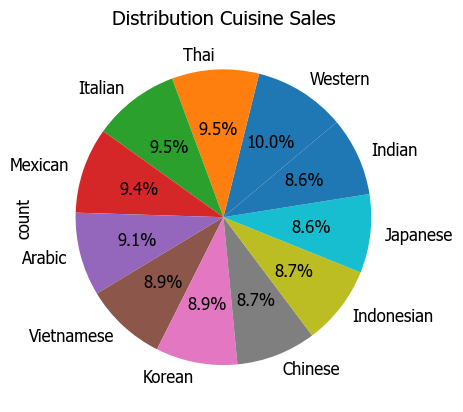

In [71]:
plt.Figure(figsize=(12,6))
cuisine_counts.plot.pie(autopct='%1.1f%%',startangle=400)
plt.title('Distribution Cuisine Sales')

/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/3694484744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='cuisine_type',order=df.cuisine_type.value_counts().index,palette='viridis')


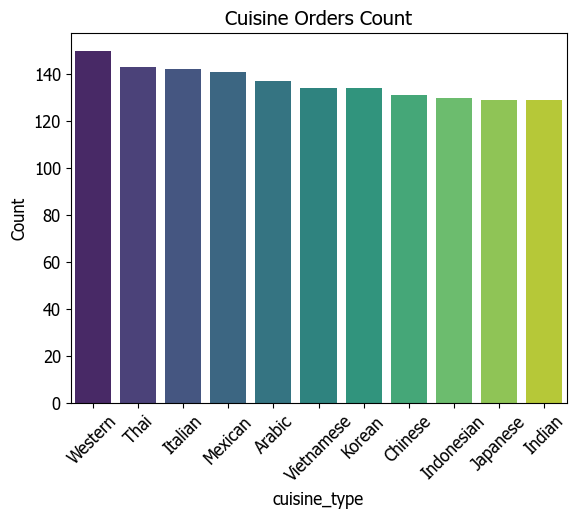

In [72]:
plt.Figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='cuisine_type',order=df.cuisine_type.value_counts().index,palette='viridis')

plt.title('Cuisine Orders Count')
plt.xlabel('cuisine_type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [73]:
df.columns

Index(['customer_id', 'visit_date', 'age', 'gender', 'cuisine_type',
       'restaurant_location', 'party_size', 'wait_time', 'food_quality',
       'service_quality', 'ambiance_rating', 'price_value', 'overall_rating',
       'spending_per_person', 'total_spending', 'recommend', 'will_return',
       'payment_method', 'visit_time', 'day_of_week', 'is_weekend',
       'response_time', 'cleanliness', 'review_text', 'visit_Year',
       'visit_Month', 'visit_Day'],
      dtype='object')

In [76]:
correlation= df['food_quality'].corr(df['service_quality'])
print(f'Correlation : {correlation:.4f}')

Correlation : 0.6785


In [77]:
avg_food_quality = df['food_quality'].mean()
avg_service_quality = df['service_quality'].mean()

print(f'AVG Food: {avg_food_quality:.4f}')
print(f'AVG Service: {avg_service_quality:.4f}')

AVG Food: 3.3573
AVG Service: 3.4007


In [78]:
service_by_food_quality=df.groupby('food_quality')['service_quality'].mean().reset_index()
service_by_food_quality.columns =['Food Quality Rating','Average Service Quality']
print("\nตารางเปรียบเทียบคะแนนบริการเฉลี่ยตามลำดับคุณภาพอาหาร\n")
print(service_by_food_quality)


ตารางเปรียบเทียบคะแนนบริการเฉลี่ยตามลำดับคุณภาพอาหาร

   Food Quality Rating  Average Service Quality
0                    1                 1.979452
1                    2                 2.414815
2                    3                 2.991228
3                    4                 3.997409
4                    5                 4.477528


In [79]:
food_impact= df['food_quality'].corr(df['overall_rating'])
service_impact= df['service_quality'].corr(df['overall_rating'])
print(f'Food Impact: {food_impact:.4f}')
print(f'Service Impact {service_impact:.4f}')


Food Impact: 0.8712
Service Impact 0.8631


In [80]:
# สร้างรายการคอลัมน์ที่เราสนใจเปรียบเทียบ
impact_cols = ['food_quality', 'service_quality', 'ambiance_rating']

# คำนวณค่าสหสัมพันธ์ของคอลัมน์เหล่านี้เทียบกับ overall_rating
impact_correlation = df[impact_cols].corrwith(df['overall_rating']).sort_values(ascending=False)

print("\n--- ตารางแสดงความสัมพันธ์กับคะแนนรวม (Overall Rating) ---")
print(impact_correlation.to_frame(name='Correlation with Overall Rating'))


--- ตารางแสดงความสัมพันธ์กับคะแนนรวม (Overall Rating) ---
                 Correlation with Overall Rating
food_quality                            0.871239
service_quality                         0.863123
ambiance_rating                         0.857562


In [81]:
# 1.1 การนับจำนวนการมาเยือนตามวันในสัปดาห์ (day_of_week)
visits_by_day = df['day_of_week'].value_counts().sort_index()
print("--- จำนวนการมาเยือนตามวันในสัปดาห์ ---")
print(visits_by_day)

# 1.2 การนับจำนวนการมาเยือนเฉพาะช่วงวันหยุดสุดสัปดาห์ (is_weekend)
visits_by_weekend = df['is_weekend'].value_counts()
print("\n--- จำนวนการมาเยือน (วันธรรมดา vs. วันหยุด) ---")
print(visits_by_weekend)

# 1.3 วิเคราะห์รายได้เฉลี่ยตามวันในสัปดาห์ (สมมติว่าต้องการดู total_spending)
spending_by_day = df.groupby('day_of_week')['total_spending'].mean().sort_index()
print("\n--- ยอดใช้จ่ายรวมเฉลี่ยตามวันในสัปดาห์ ---")
print(spending_by_day)

--- จำนวนการมาเยือนตามวันในสัปดาห์ ---
day_of_week
Friday       224
Monday       214
Saturday     212
Sunday       218
Thursday     198
Tuesday      222
Wednesday    212
Name: count, dtype: int64

--- จำนวนการมาเยือน (วันธรรมดา vs. วันหยุด) ---
is_weekend
0    1070
1     430
Name: count, dtype: int64

--- ยอดใช้จ่ายรวมเฉลี่ยตามวันในสัปดาห์ ---
day_of_week
Friday       1.239966e+06
Monday       1.172381e+06
Saturday     1.176965e+06
Sunday       1.243785e+06
Thursday     1.205542e+06
Tuesday      1.021758e+06
Wednesday    1.155770e+06
Name: total_spending, dtype: float64


In [82]:
# 2.1 หาก visit_time เป็น Object/String ที่มีข้อมูลเวลา (เช่น '19:30')
# อาจต้องแปลงเป็นชั่วโมงหรือช่วงเวลา (เช่น Morning, Lunch, Dinner)
# ตัวอย่างการสร้างช่วงเวลา (ถ้า df['visit_time'] เป็น datetime/time object):

# สร้างคอลัมน์ใหม่ 'time_of_day' เพื่อแบ่งเป็น 3 ช่วงหลัก (ตัวอย่าง)
# โดยสมมติว่า 'visit_time' ถูกแปลงเป็นรูปแบบที่เปรียบเทียบได้แล้ว (เช่น ชั่วโมง)
# df['hour'] = pd.to_datetime(df['visit_time']).dt.hour 
#
# def categorize_time(hour):
#     if 11 <= hour < 14:
#         return 'Lunch'
#     elif 17 <= hour < 22:
#         return 'Dinner'
#     else:
#         return 'Other'
# df['time_of_day'] = df['hour'].apply(categorize_time)

# 2.2 นับจำนวนการมาเยือนตามช่วงเวลา
# visits_by_time_of_day = df['time_of_day'].value_counts()
# print("\n--- จำนวนการมาเยือนตามช่วงเวลาของวัน ---")
# print(visits_by_time_of_day)

In [83]:
# 3.1 ตรวจสอบและแปลง visit_date ให้เป็น datetime object ก่อน (ถ้ายังไม่ได้ทำ)
df['visit_date'] = pd.to_datetime(df['visit_date'])

# 3.2 การจัดกลุ่มตามเดือนเพื่อดูแนวโน้มรายเดือน
# สร้างคอลัมน์ 'year_month'
df['year_month'] = df['visit_date'].dt.to_period('M')

# นับจำนวนลูกค้า (transaction count) หรือยอดใช้จ่ายรวมตามเดือน
monthly_visits = df.groupby('year_month').size()
monthly_spending = df.groupby('year_month')['total_spending'].sum()

print("\n--- แนวโน้มจำนวนการมาเยือนรายเดือน ---")
print(monthly_visits)
print("\n--- แนวโน้มยอดใช้จ่ายรวมรายเดือน ---")
print(monthly_spending)


--- แนวโน้มจำนวนการมาเยือนรายเดือน ---
year_month
2023-11    46
2023-12    56
2024-01    72
2024-02    56
2024-03    48
2024-04    68
2024-05    70
2024-06    62
2024-07    59
2024-08    52
2024-09    68
2024-10    67
2024-11    58
2024-12    68
2025-01    60
2025-02    65
2025-03    67
2025-04    55
2025-05    71
2025-06    65
2025-07    78
2025-08    60
2025-09    52
2025-10    60
2025-11    17
Freq: M, dtype: int64

--- แนวโน้มยอดใช้จ่ายรวมรายเดือน ---
year_month
2023-11     49232005
2023-12     77433187
2024-01     76960340
2024-02     68233283
2024-03     51453840
2024-04     88591883
2024-05     84062379
2024-06     63793718
2024-07     68074316
2024-08     66021244
2024-09    103734206
2024-10     74007151
2024-11     55285933
2024-12     72194680
2025-01     70301049
2025-02     72025762
2025-03     71210372
2025-04     69191492
2025-05     93743859
2025-06     70736067
2025-07     95083407
2025-08     61639751
2025-09     64072452
2025-10     73856773
2025-11     18915117
Fre

In [84]:
# 1.1 การนับความถี่ของแต่ละขนาดกลุ่ม
party_size_counts = df['party_size'].value_counts().sort_index()
print("--- จำนวนการมาเยือนตามขนาดกลุ่ม (Party Size) ---")
print(party_size_counts)

# 1.2 คำนวณร้อยละของการมาเยือนของแต่ละขนาดกลุ่ม
party_size_percentage = df['party_size'].value_counts(normalize=True).mul(100).sort_index()
print("\n--- ร้อยละของการมาเยือนตามขนาดกลุ่ม ---")
print(party_size_percentage.map('{:.2f}%'.format))

--- จำนวนการมาเยือนตามขนาดกลุ่ม (Party Size) ---
party_size
1    204
2    213
3    191
4    182
5    173
6    177
7    168
8    192
Name: count, dtype: int64

--- ร้อยละของการมาเยือนตามขนาดกลุ่ม ---
party_size
1    13.60%
2    14.20%
3    12.73%
4    12.13%
5    11.53%
6    11.80%
7    11.20%
8    12.80%
Name: proportion, dtype: object


In [85]:
# 2.1 ยอดใช้จ่ายรวมเฉลี่ยตามขนาดกลุ่ม (total_spending)
avg_total_spending = df.groupby('party_size')['total_spending'].mean()
print("\n--- ยอดใช้จ่ายรวมเฉลี่ยต่อบิลตามขนาดกลุ่ม ---")
print(avg_total_spending.map('{:.2f}'.format))

# 2.2 ยอดใช้จ่ายเฉลี่ยต่อคนตามขนาดกลุ่ม (spending_per_person)
avg_spending_per_person = df.groupby('party_size')['spending_per_person'].mean()
print("\n--- ยอดใช้จ่ายเฉลี่ยต่อคนตามขนาดกลุ่ม ---")
print(avg_spending_per_person.map('{:.2f}'.format))


--- ยอดใช้จ่ายรวมเฉลี่ยต่อบิลตามขนาดกลุ่ม ---
party_size
1     286363.29
2     540813.19
3     794821.88
4    1104060.68
5    1415628.93
6    1595012.51
7    1867540.46
8    2044401.58
Name: total_spending, dtype: object

--- ยอดใช้จ่ายเฉลี่ยต่อคนตามขนาดกลุ่ม ---
party_size
1    286363.29
2    270406.60
3    264940.63
4    276015.17
5    283125.79
6    265835.42
7    266791.49
8    255550.20
Name: spending_per_person, dtype: object


In [86]:
# 3.1 คะแนนรวมเฉลี่ยตามขนาดกลุ่ม
avg_overall_rating = df.groupby('party_size')['overall_rating'].mean()
print("\n--- คะแนนรวมเฉลี่ยตามขนาดกลุ่ม ---")
print(avg_overall_rating.map('{:.3f}'.format))


--- คะแนนรวมเฉลี่ยตามขนาดกลุ่ม ---
party_size
1    3.356
2    3.402
3    3.539
4    3.440
5    3.424
6    3.338
7    3.482
8    3.366
Name: overall_rating, dtype: object


In [87]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 1. ค้นหาชื่อ Font ที่รองรับภาษาไทยในระบบของคุณ
# (ชื่อ Font ที่ใช้ได้จะแตกต่างกันไปตามระบบปฏิบัติการ)
# Font ยอดนิยมที่มักจะใช้ได้: 'Tahoma', 'Angsana New', 'TH Sarabun New', 'Nithan'
thai_font_name = 'Tahoma' # ลองเปลี่ยนเป็น Font อื่นๆ หาก Tahoma ไม่ได้ผล

# 2. ตั้งค่า Font หลักให้กับ Matplotlib
# 2.1 ใช้ rcParams เพื่อตั้งค่า Font สำหรับข้อความทั้งหมด
plt.rcParams['font.family'] = thai_font_name
plt.rcParams['font.size'] = 12 # สามารถปรับขนาดตัวอักษรตามต้องการ
plt.rcParams['axes.unicode_minus'] = False # ป้องกันไม่ให้เครื่องหมายลบแสดงเป็นสี่เหลี่ยม

print(f"ตั้งค่า Font Matplotlib เป็น: {thai_font_name} เรียบร้อยแล้ว")

ตั้งค่า Font Matplotlib เป็น: Tahoma เรียบร้อยแล้ว


/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/4169408393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')


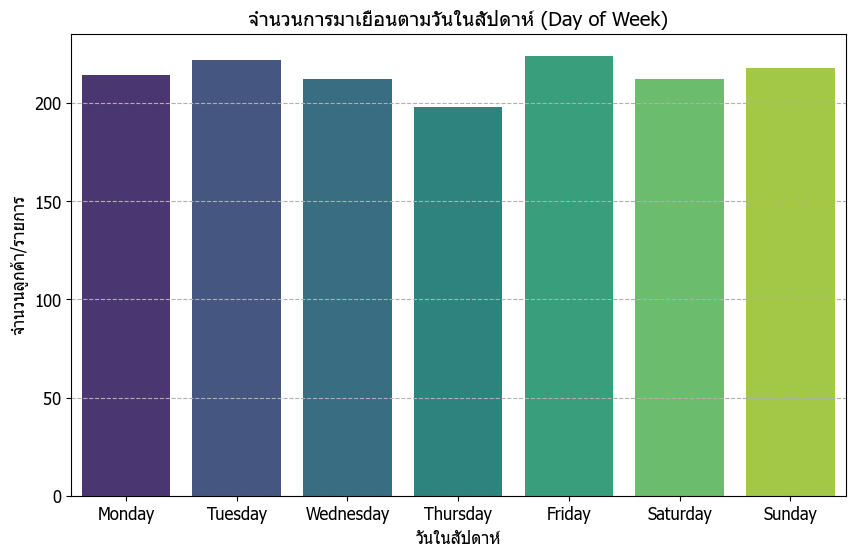

/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/4169408393.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='total_spending', order=day_order, palette='mako')


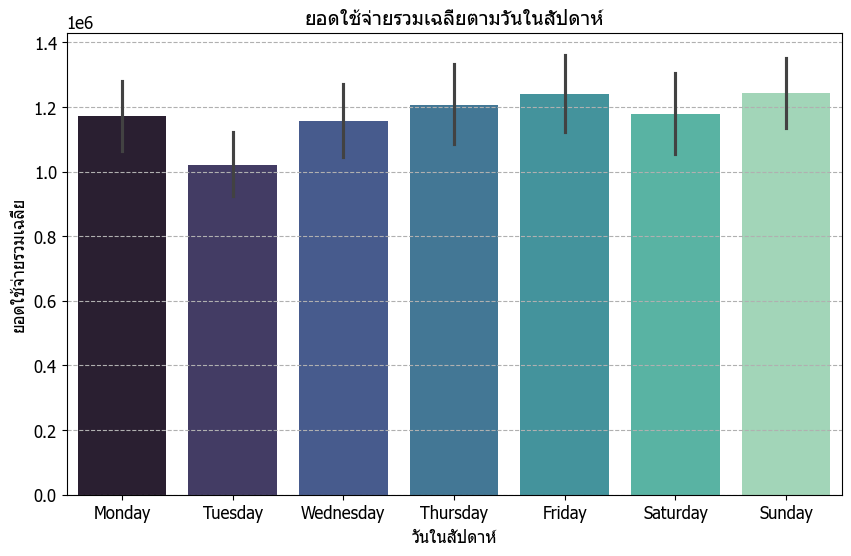

In [88]:
# กำหนดลำดับของวันในสัปดาห์ (เพื่อไม่ให้กราฟเรียงตามตัวอักษร)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
# ใช้ Count Plot นับจำนวนรายการในแต่ละวัน
sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')
plt.title('จำนวนการมาเยือนตามวันในสัปดาห์ (Day of Week)')
plt.xlabel('วันในสัปดาห์')
plt.ylabel('จำนวนลูกค้า/รายการ')
plt.grid(axis='y', linestyle='--')
plt.show()

# วิเคราะห์ยอดใช้จ่ายเฉลี่ยตามวันในสัปดาห์
plt.figure(figsize=(10, 6))
# ใช้ Bar Plot แสดงค่าเฉลี่ย total_spending
sns.barplot(data=df, x='day_of_week', y='total_spending', order=day_order, palette='mako')
plt.title('ยอดใช้จ่ายรวมเฉลี่ยตามวันในสัปดาห์')
plt.xlabel('วันในสัปดาห์')
plt.ylabel('ยอดใช้จ่ายรวมเฉลี่ย')
plt.grid(axis='y', linestyle='--')
plt.show()

/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/2522861208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_weekend', palette='Set2')


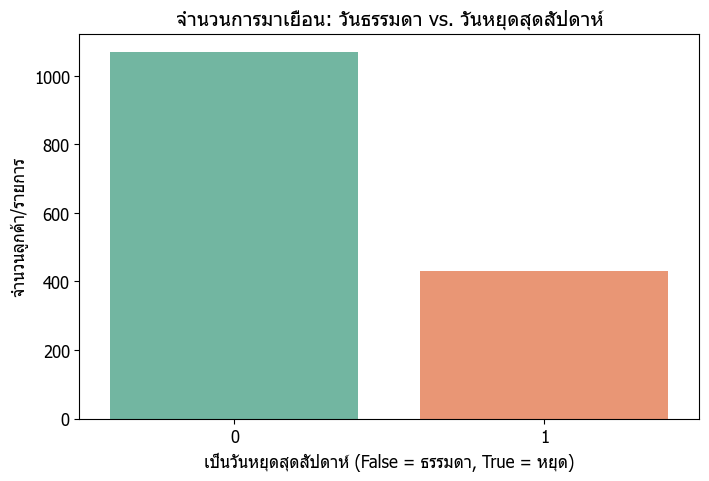

/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/2522861208.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='is_weekend', y='overall_rating', palette='Set2')


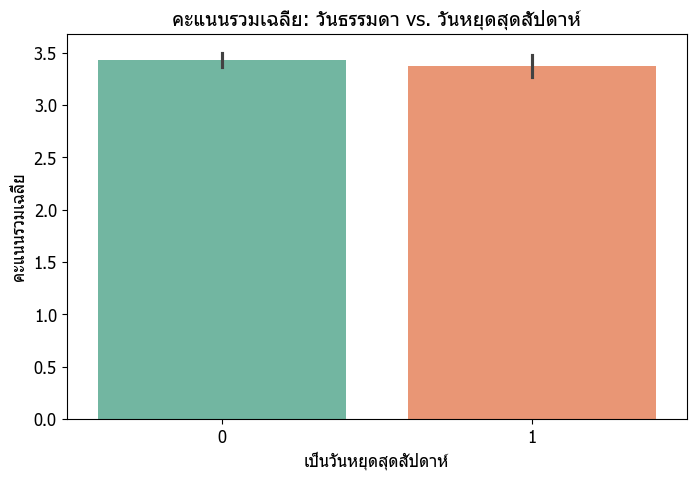

In [89]:
plt.figure(figsize=(8, 5))
# Count Plot เปรียบเทียบจำนวนการมาเยือน
sns.countplot(data=df, x='is_weekend', palette='Set2')
plt.title('จำนวนการมาเยือน: วันธรรมดา vs. วันหยุดสุดสัปดาห์')
plt.xlabel('เป็นวันหยุดสุดสัปดาห์ (False = ธรรมดา, True = หยุด)')
plt.ylabel('จำนวนลูกค้า/รายการ')
plt.show()

plt.figure(figsize=(8, 5))
# Bar Plot เปรียบเทียบค่าเฉลี่ย overall_rating
sns.barplot(data=df, x='is_weekend', y='overall_rating', palette='Set2')
plt.title('คะแนนรวมเฉลี่ย: วันธรรมดา vs. วันหยุดสุดสัปดาห์')
plt.xlabel('เป็นวันหยุดสุดสัปดาห์')
plt.ylabel('คะแนนรวมเฉลี่ย')
plt.show()

--- จำนวนการมาเยือนตามประเภทอาหาร ---
cuisine_type
Western       150
Thai          143
Italian       142
Mexican       141
Arabic        137
Vietnamese    134
Korean        134
Chinese       131
Indonesian    130
Japanese      129
Indian        129
Name: count, dtype: int64


/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/2409302864.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='cuisine_type', order=cuisine_counts.index, palette='Spectral')


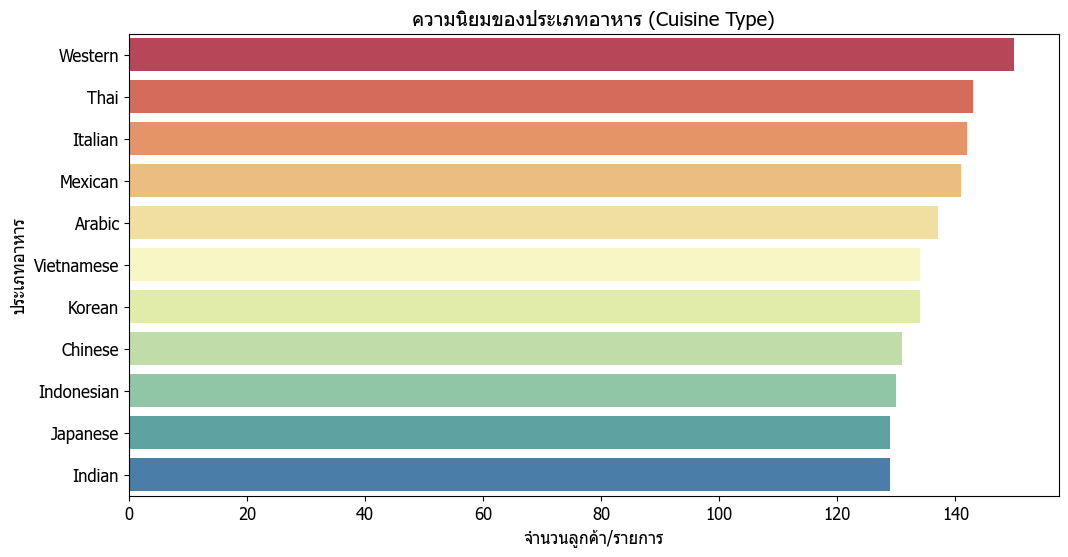

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.1 นับความถี่ของประเภทอาหาร
cuisine_counts = df['cuisine_type'].value_counts()
print("--- จำนวนการมาเยือนตามประเภทอาหาร ---")
print(cuisine_counts)

# 1.2 กราฟ Bar Plot แสดงความนิยมของประเภทอาหาร
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='cuisine_type', order=cuisine_counts.index, palette='Spectral')
plt.title('ความนิยมของประเภทอาหาร (Cuisine Type)')
plt.xlabel('จำนวนลูกค้า/รายการ')
plt.ylabel('ประเภทอาหาร')
plt.show()


--- จำนวนการมาเยือนตามที่ตั้งร้านอาหาร ---
restaurant_location
Bekasi             205
Tangerang          202
Depok              193
North Jakarta      192
Central Jakarta    185
East Jakarta       183
South Jakarta      180
West Jakarta       160
Name: count, dtype: int64


/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/2877141910.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='restaurant_location', y='total_spending', order=location_counts.index, palette='Set1')


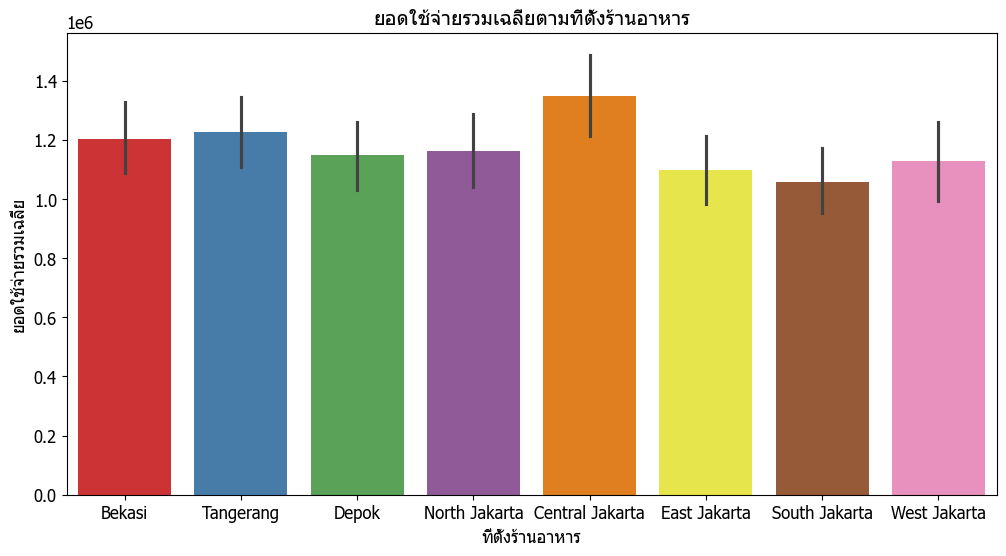

In [93]:
# 2.1 นับความถี่ของที่ตั้งร้าน
location_counts = df['restaurant_location'].value_counts()
print("\n--- จำนวนการมาเยือนตามที่ตั้งร้านอาหาร ---")
print(location_counts)

# 2.2 กราฟ Bar Plot แสดงยอดใช้จ่ายรวมเฉลี่ยตามที่ตั้ง
plt.figure(figsize=(12, 6))
# ใช้ Bar Plot แสดงค่าเฉลี่ย total_spending
sns.barplot(data=df, x='restaurant_location', y='total_spending', order=location_counts.index, palette='Set1')
plt.title('ยอดใช้จ่ายรวมเฉลี่ยตามที่ตั้งร้านอาหาร')
plt.xlabel('ที่ตั้งร้านอาหาร')
plt.ylabel('ยอดใช้จ่ายรวมเฉลี่ย')
plt.show()

In [94]:
# 3.1 ตาราง Pivot แสดงคะแนนรวมเฉลี่ย (overall_rating)
# เพื่อดูว่าประเภทอาหารไหนที่ได้คะแนนดีที่สุด
cuisine_rating = df.groupby('cuisine_type')['overall_rating'].mean().sort_values(ascending=False)
print("\n--- คะแนนรวมเฉลี่ยตามประเภทอาหาร ---")
print(cuisine_rating.to_frame(name='Average Overall Rating'))

# 3.2 ตาราง Pivot แสดงคะแนนรวมเฉลี่ยตามที่ตั้ง
location_rating = df.groupby('restaurant_location')['overall_rating'].mean().sort_values(ascending=False)
print("\n--- คะแนนรวมเฉลี่ยตามที่ตั้งร้านอาหาร ---")
print(location_rating.to_frame(name='Average Overall Rating'))


--- คะแนนรวมเฉลี่ยตามประเภทอาหาร ---
              Average Overall Rating
cuisine_type                        
Thai                        3.567832
Korean                      3.506716
Japanese                    3.490698
Arabic                      3.479562
Indian                      3.437984
Western                     3.423333
Mexican                     3.404965
Italian                     3.372535
Vietnamese                  3.347761
Chinese                     3.291603
Indonesian                  3.253846

--- คะแนนรวมเฉลี่ยตามที่ตั้งร้านอาหาร ---
                     Average Overall Rating
restaurant_location                        
Bekasi                             3.564878
Tangerang                          3.489109
Depok                              3.431606
Central Jakarta                    3.428108
North Jakarta                      3.426042
South Jakarta                      3.329444
East Jakarta                       3.320219
West Jakarta                       3.30687

In [95]:
# 1.1 ทำเลทอง (Traffic): นับจำนวนลูกค้าในแต่ละที่ตั้ง
location_counts = df['restaurant_location'].value_counts().sort_values(ascending=False)

# 1.2 ทำเลทำเงิน (Revenue): ยอดใช้จ่ายรวมเฉลี่ยต่อบิลตามที่ตั้ง
avg_total_spending = df.groupby('restaurant_location')['total_spending'].mean().sort_values(ascending=False)

# 1.3 ทำเลมีปัญหา (Quality Issue): คะแนนรวมเฉลี่ยตามที่ตั้ง
avg_overall_rating = df.groupby('restaurant_location')['overall_rating'].mean().sort_values(ascending=False)

print("--- 🥇 ทำเลทอง (Traffic): จำนวนลูกค้าสูงสุด ---")
print(location_counts)

print("\n--- 💰 ทำเลทำเงิน (Revenue): ยอดใช้จ่ายเฉลี่ยสูงสุด ---")
print(avg_total_spending.map('{:.2f}'.format))

print("\n--- ⭐ ทำเลมีปัญหา (Quality Issue): คะแนนรวมเฉลี่ยสูงสุด ---")
print(avg_overall_rating.map('{:.3f}'.format))

--- 🥇 ทำเลทอง (Traffic): จำนวนลูกค้าสูงสุด ---
restaurant_location
Bekasi             205
Tangerang          202
Depok              193
North Jakarta      192
Central Jakarta    185
East Jakarta       183
South Jakarta      180
West Jakarta       160
Name: count, dtype: int64

--- 💰 ทำเลทำเงิน (Revenue): ยอดใช้จ่ายเฉลี่ยสูงสุด ---
restaurant_location
Central Jakarta    1349271.30
Tangerang          1224551.27
Bekasi             1201490.57
North Jakarta      1163339.16
Depok              1147461.26
West Jakarta       1127433.59
East Jakarta       1097367.73
South Jakarta      1058585.23
Name: total_spending, dtype: object

--- ⭐ ทำเลมีปัญหา (Quality Issue): คะแนนรวมเฉลี่ยสูงสุด ---
restaurant_location
Bekasi             3.565
Tangerang          3.489
Depok              3.432
Central Jakarta    3.428
North Jakarta      3.426
South Jakarta      3.329
East Jakarta       3.320
West Jakarta       3.307
Name: overall_rating, dtype: object


/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/337357098.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='restaurant_location', order=location_counts.index, palette='viridis')


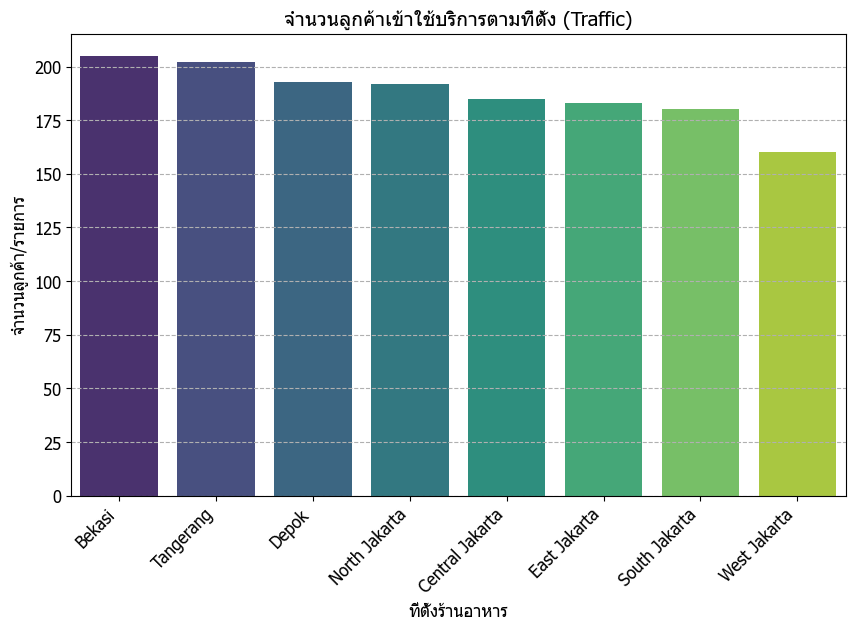

/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/337357098.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_revenue, x='restaurant_location', y='avg_spending', order=avg_total_spending.index, palette='magma')


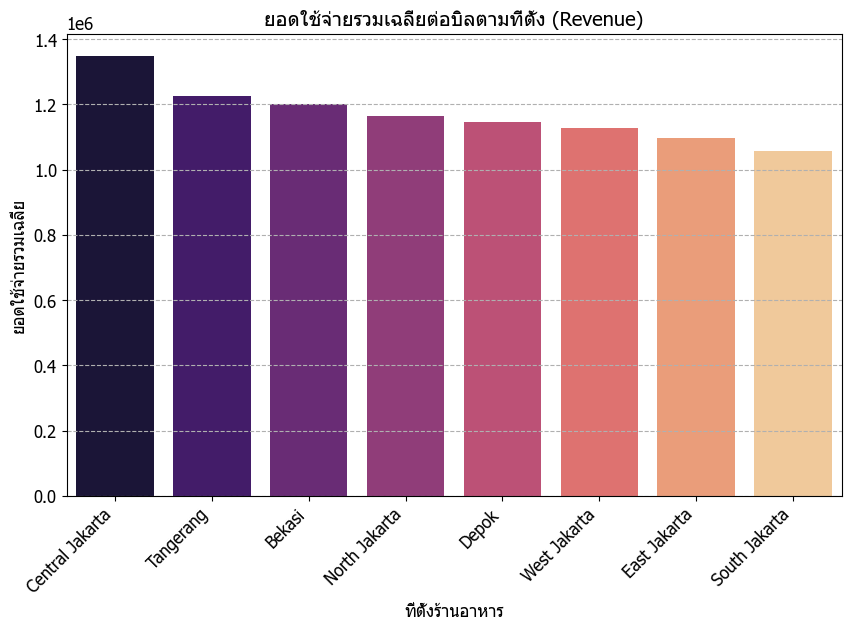

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2.1 กราฟเปรียบเทียบจำนวนลูกค้า (Traffic)
plt.figure(figsize=(10, 6))
# ใช้ order ตาม location_counts เพื่อเรียงจากมากไปน้อย
sns.countplot(data=df, x='restaurant_location', order=location_counts.index, palette='viridis')
plt.title('จำนวนลูกค้าเข้าใช้บริการตามที่ตั้ง (Traffic)')
plt.xlabel('ที่ตั้งร้านอาหาร')
plt.ylabel('จำนวนลูกค้า/รายการ')
plt.xticks(rotation=45, ha='right') # หมุนแกน x เพื่อให้อ่านง่าย
plt.grid(axis='y', linestyle='--')
plt.show()

# 2.2 กราฟเปรียบเทียบยอดใช้จ่ายเฉลี่ย (Revenue)
# เตรียมข้อมูลสำหรับกราฟ: แปลง Series เป็น DataFrame แล้วตั้งชื่อคอลัมน์
df_revenue = avg_total_spending.reset_index(name='avg_spending')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_revenue, x='restaurant_location', y='avg_spending', order=avg_total_spending.index, palette='magma')
plt.title('ยอดใช้จ่ายรวมเฉลี่ยต่อบิลตามที่ตั้ง (Revenue)')
plt.xlabel('ที่ตั้งร้านอาหาร')
plt.ylabel('ยอดใช้จ่ายรวมเฉลี่ย')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

In [97]:
# 1.1 คำนวณค่าเฉลี่ยและค่ามัธยฐาน (Median)
avg_wait_time = df['wait_time'].mean()
median_wait_time = df['wait_time'].median()
avg_response_time = df['response_time'].mean()

print("--- เวลาปฏิบัติงานเฉลี่ย ---")
print(f"เวลารอคิว/รออาหารเฉลี่ย: {avg_wait_time:.2f} นาที")
print(f"เวลาตอบสนองของพนักงานเฉลี่ย: {avg_response_time:.2f} นาที")
print(f"เวลารอคิว/รออาหารมัธยฐาน: {median_wait_time:.2f} นาที")

# 1.2 ความสัมพันธ์กับคะแนนโดยรวม (overall_rating)
wait_corr = df['wait_time'].corr(df['overall_rating'])
response_corr = df['response_time'].corr(df['overall_rating'])

print("\n--- ความสัมพันธ์กับคะแนนรวม (Overall Rating) ---")
# สหสัมพันธ์ติดลบ (Negative Correlation) หมายความว่า "ยิ่งรอนาน ยิ่งได้คะแนนต่ำ"
print(f"สหสัมพันธ์ (Wait Time vs. Overall Rating): {wait_corr:.4f}")
print(f"สหสัมพันธ์ (Response Time vs. Overall Rating): {response_corr:.4f}")

--- เวลาปฏิบัติงานเฉลี่ย ---
เวลารอคิว/รออาหารเฉลี่ย: 32.24 นาที
เวลาตอบสนองของพนักงานเฉลี่ย: 17.11 นาที
เวลารอคิว/รออาหารมัธยฐาน: 32.00 นาที

--- ความสัมพันธ์กับคะแนนรวม (Overall Rating) ---
สหสัมพันธ์ (Wait Time vs. Overall Rating): 0.0440
สหสัมพันธ์ (Response Time vs. Overall Rating): 0.0048


--- เวลาปฏิบัติงานเฉลี่ย ---
เวลารอคิว/รออาหารเฉลี่ย: 32.24 นาที
เวลาตอบสนองของพนักงานเฉลี่ย: 17.11 นาที
เวลารอคิว/รออาหารมัธยฐาน: 32.00 นาที

--- ความสัมพันธ์กับคะแนนรวม (Overall Rating) ---
สหสัมพันธ์ (Wait Time vs. Overall Rating): 0.0440
สหสัมพันธ์ (Response Time vs. Overall Rating): 0.0048


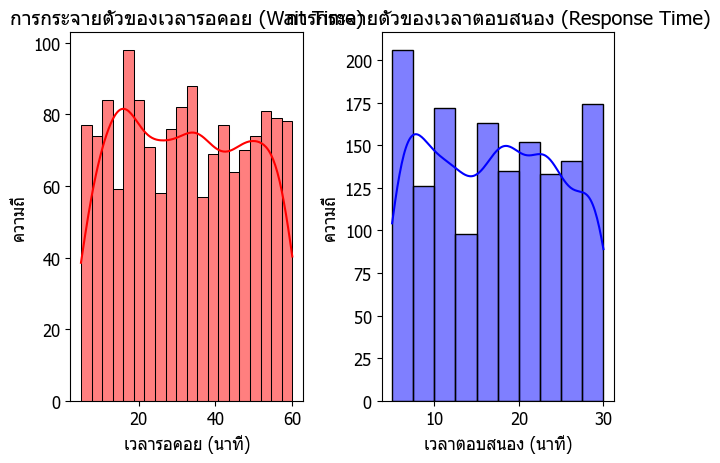

In [99]:
# 2.1 กราฟการกระจายตัวของ Wait Time
plt.subplot(1, 2, 1) # สร้างกราฟ 2 กราฟในแถวเดียว
sns.histplot(df['wait_time'], bins=20, kde=True, color='red')
plt.title('การกระจายตัวของเวลารอคอย (Wait Time)')
plt.xlabel('เวลารอคอย (นาที)')
plt.ylabel('ความถี่')

# 2.2 กราฟการกระจายตัวของ Response Time
plt.subplot(1, 2, 2)
sns.histplot(df['response_time'], bins=10, kde=True, color='blue')
plt.title('การกระจายตัวของเวลาตอบสนอง (Response Time)')
plt.xlabel('เวลาตอบสนอง (นาที)')
plt.ylabel('ความถี่')

plt.tight_layout() # จัดระเบียบกราฟไม่ให้ทับซ้อนกัน
plt.show()

In [100]:
# จัดกลุ่มตามคะแนนบริการ และดูเวลารอเฉลี่ยในแต่ละกลุ่ม
wait_by_service_rating = df.groupby('service_quality')[['wait_time', 'response_time']].mean()

print("\n--- เวลาเฉลี่ยตามคะแนนคุณภาพบริการ (Service Quality) ---")
print(wait_by_service_rating.map('{:.2f}'.format))


--- เวลาเฉลี่ยตามคะแนนคุณภาพบริการ (Service Quality) ---
                wait_time response_time
service_quality                        
1                   31.68         17.20
2                   31.88         16.60
3                   31.42         16.98
4                   33.14         17.02
5                   32.56         17.61


In [101]:
# จัดกลุ่มตามขนาดกลุ่มลูกค้า (party_size) และคำนวณค่าเฉลี่ย
wait_time_by_party = df.groupby('party_size')[['wait_time', 'response_time']].agg(
    avg_wait=('wait_time', 'mean'),
    median_wait=('wait_time', 'median'),
    avg_response=('response_time', 'mean')
)

print("--- เวลารอคอยเฉลี่ยและมัธยฐานตามขนาดกลุ่มลูกค้า (Party Size) ---")
print(wait_time_by_party.map('{:.2f}'.format))

--- เวลารอคอยเฉลี่ยและมัธยฐานตามขนาดกลุ่มลูกค้า (Party Size) ---
           avg_wait median_wait avg_response
party_size                                  
1             31.41       32.00        17.98
2             31.51       30.00        16.31
3             29.09       29.00        17.09
4             32.18       33.00        16.93
5             33.38       35.00        17.88
6             36.02       37.00        16.79
7             32.82       32.00        16.95
8             32.12       30.50        16.98


--- เวลารอคอยเฉลี่ยและมัธยฐานตามขนาดกลุ่มลูกค้า (Party Size) ---
           avg_wait median_wait avg_response
party_size                                  
1             31.41       32.00        17.98
2             31.51       30.00        16.31
3             29.09       29.00        17.09
4             32.18       33.00        16.93
5             33.38       35.00        17.88
6             36.02       37.00        16.79
7             32.82       32.00        16.95
8             32.12       30.50        16.98


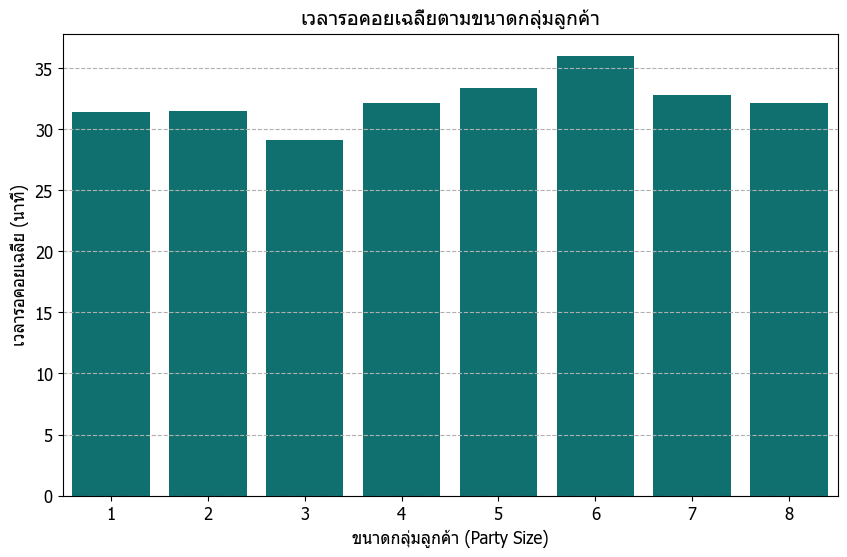

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# ใช้ข้อมูลที่จัดกลุ่มแล้วสำหรับกราฟ (ต้องรีเซ็ต index ก่อน)
df_plot = wait_time_by_party.reset_index()

plt.figure(figsize=(10, 6))
# กราฟแสดงเวลารอคอยเฉลี่ยตามขนาดกลุ่ม
sns.barplot(data=df_plot, x='party_size', y='avg_wait', color='teal')
plt.title('เวลารอคอยเฉลี่ยตามขนาดกลุ่มลูกค้า')
plt.xlabel('ขนาดกลุ่มลูกค้า (Party Size)')
plt.ylabel('เวลารอคอยเฉลี่ย (นาที)')
plt.grid(axis='y', linestyle='--')
plt.show()

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.1 สร้างตารางไขว้ (Cross-Tabulation) ระหว่าง Recommend และ Will Return
# normalize='index' จะแสดงเป็นเปอร์เซ็นต์ของแต่ละแถว (เช่น % ของลูกค้าที่บอกว่าจะกลับมา ว่าพวกเขาจะแนะนำต่อหรือไม่)
loyalty_crosstab = pd.crosstab(df['will_return'], df['recommend'], normalize='index')
loyalty_counts = pd.crosstab(df['will_return'], df['recommend'])

print("--- จำนวนลูกค้า (Count) ตามความตั้งใจกลับมาและแนะนำต่อ ---")
print(loyalty_counts)

print("\n--- สัดส่วนลูกค้า (Percentage) ตามความตั้งใจกลับมาและแนะนำต่อ ---")
print(loyalty_crosstab.map('{:.2%}'.format))

--- จำนวนลูกค้า (Count) ตามความตั้งใจกลับมาและแนะนำต่อ ---
recommend     No  Yes
will_return          
No           538    0
Yes          158  804

--- สัดส่วนลูกค้า (Percentage) ตามความตั้งใจกลับมาและแนะนำต่อ ---
recommend         No     Yes
will_return                 
No           100.00%   0.00%
Yes           16.42%  83.58%


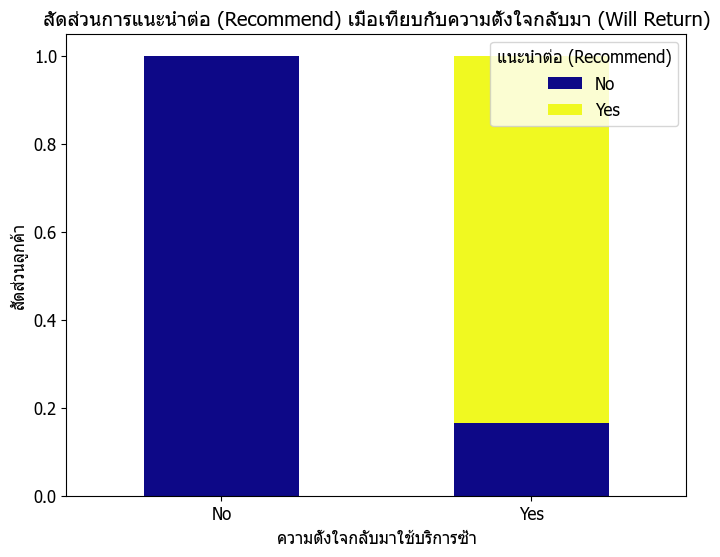

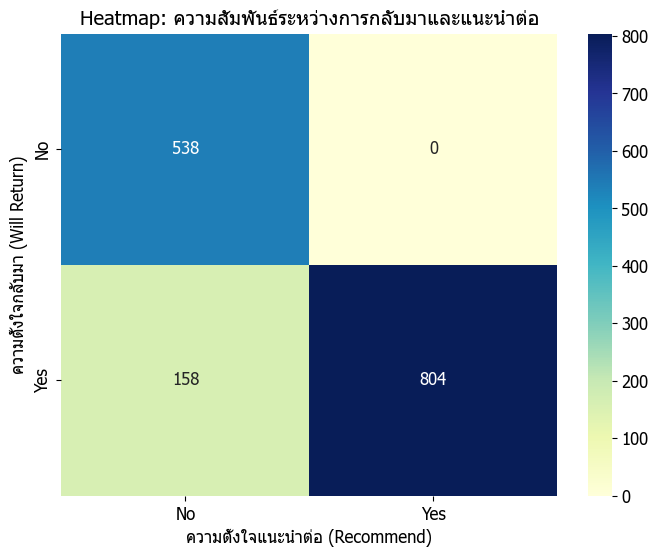

In [106]:
# 2.1 กราฟ Stacked Bar Chart (แสดงสัดส่วนจาก loyalty_crosstab)
loyalty_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='plasma')
plt.title('สัดส่วนการแนะนำต่อ (Recommend) เมื่อเทียบกับความตั้งใจกลับมา (Will Return)')
plt.xlabel('ความตั้งใจกลับมาใช้บริการซ้ำ')
plt.ylabel('สัดส่วนลูกค้า')
plt.xticks(rotation=0)
plt.legend(title='แนะนำต่อ (Recommend)')
plt.show()

# 2.2 Heatmap (แสดงจำนวนนับจาก loyalty_counts)
plt.figure(figsize=(8, 6))
sns.heatmap(loyalty_counts, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: ความสัมพันธ์ระหว่างการกลับมาและแนะนำต่อ')
plt.xlabel('ความตั้งใจแนะนำต่อ (Recommend)')
plt.ylabel('ความตั้งใจกลับมา (Will Return)')
plt.show()

In [107]:
# ดูว่าความตั้งใจกลับมาและแนะนำต่อสัมพันธ์กับคะแนนรวมอย่างไร
avg_rating_by_loyalty = df.groupby(['will_return', 'recommend'])['overall_rating'].mean()
print("\n--- คะแนนรวมเฉลี่ยตามระดับความภักดี ---")
print(avg_rating_by_loyalty.map('{:.2f}'.format))



--- คะแนนรวมเฉลี่ยตามระดับความภักดี ---
will_return  recommend
No           No           2.14
Yes          No           3.10
             Yes          4.33
Name: overall_rating, dtype: object


In [108]:
# 1.1 คำนวณค่าเฉลี่ยของยอดใช้จ่าย
avg_total_spending = df['total_spending'].mean()
avg_spending_per_person = df['spending_per_person'].mean()

print("--- ตัวชี้วัดทางการเงินเฉลี่ย ---")
print(f"ยอดใช้จ่ายรวมเฉลี่ยต่อบิล: {avg_total_spending:.2f}")
print(f"ยอดใช้จ่ายเฉลี่ยต่อคน: {avg_spending_per_person:.2f}")

# 1.2 ความสัมพันธ์ของความคุ้มค่า (Price Value) กับคะแนนโดยรวม (Overall Rating)
price_value_corr = df['price_value'].corr(df['overall_rating'])
print(f"\nสหสัมพันธ์ (Price Value vs. Overall Rating): {price_value_corr:.4f}")
# ค่าสหสัมพันธ์บวกที่สูงบ่งชี้ว่า ยิ่งลูกค้ารู้สึกว่าราคาคุ้มค่า ยิ่งให้คะแนนรวมสูง

--- ตัวชี้วัดทางการเงินเฉลี่ย ---
ยอดใช้จ่ายรวมเฉลี่ยต่อบิล: 1173236.18
ยอดใช้จ่ายเฉลี่ยต่อคน: 271182.25

สหสัมพันธ์ (Price Value vs. Overall Rating): 0.8654


In [109]:
# จัดกลุ่มตามคะแนนความคุ้มค่า (Price_value) และดูยอดใช้จ่ายเฉลี่ย
spending_by_price_value = df.groupby('price_value')[['total_spending', 'spending_per_person']].mean()

print("\n--- ยอดใช้จ่ายเฉลี่ยตามคะแนนความคุ้มค่า (Price Value) ---")
print(spending_by_price_value.map('{:.2f}'.format))


--- ยอดใช้จ่ายเฉลี่ยตามคะแนนความคุ้มค่า (Price Value) ---
            total_spending spending_per_person
price_value                                   
1               1189042.23           267130.64
2               1078925.63           262827.27
3               1211650.88           276943.88
4               1187632.51           275752.38
5               1182439.95           268786.12


/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/3990610030.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='price_value', y='spending_per_person', palette='inferno')


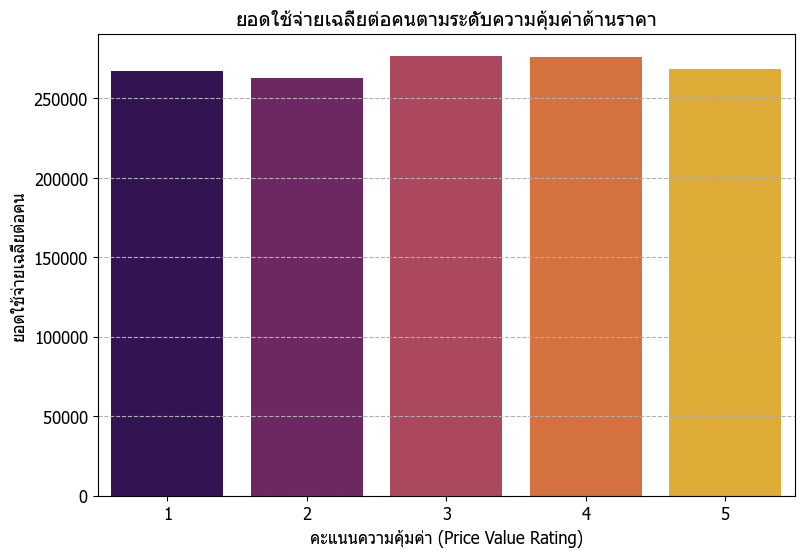

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# ใช้ข้อมูลที่จัดกลุ่มแล้วสำหรับกราฟ (ต้องรีเซ็ต index ก่อน)
df_plot = spending_by_price_value.reset_index()

plt.figure(figsize=(9, 6))
# กราฟแสดงยอดใช้จ่ายเฉลี่ยต่อคนตามคะแนนความคุ้มค่า
sns.barplot(data=df_plot, x='price_value', y='spending_per_person', palette='inferno')
plt.title('ยอดใช้จ่ายเฉลี่ยต่อคนตามระดับความคุ้มค่าด้านราคา')
plt.xlabel('คะแนนความคุ้มค่า (Price Value Rating)')
plt.ylabel('ยอดใช้จ่ายเฉลี่ยต่อคน')
plt.grid(axis='y', linestyle='--')
plt.show()

In [112]:
# 1.1 ความสัมพันธ์กับคะแนนโดยรวม (overall_rating)
cleanliness_corr = df['cleanliness'].corr(df['overall_rating'])

print("--- ความสัมพันธ์ของคะแนนความสะอาด ---")
# สหสัมพันธ์บวกที่สูงบ่งชี้ว่า ยิ่งร้านสะอาด ยิ่งได้คะแนนรวมสูง
print(f"สหสัมพันธ์ (Cleanliness vs. Overall Rating): {cleanliness_corr:.4f}")

# 1.2 คะแนนความสะอาดเฉลี่ยตามความตั้งใจกลับมา (will_return)
# ดูว่าลูกค้าที่ตั้งใจกลับมาให้คะแนนความสะอาดสูงกว่าลูกค้าที่ไม่กลับมาหรือไม่
cleanliness_by_return = df.groupby('will_return')['cleanliness'].mean()
print("\n--- คะแนนความสะอาดเฉลี่ยตามความตั้งใจกลับมา ---")
print(cleanliness_by_return.map('{:.2f}'.format))

--- ความสัมพันธ์ของคะแนนความสะอาด ---
สหสัมพันธ์ (Cleanliness vs. Overall Rating): 0.0082

--- คะแนนความสะอาดเฉลี่ยตามความตั้งใจกลับมา ---
will_return
No     3.97
Yes    4.01
Name: cleanliness, dtype: object


/var/folders/9f/93jny5vd7pqgrdchv991vcmc0000gn/T/ipykernel_9483/1307198601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cleanliness', y='overall_rating', palette='Pastel1')


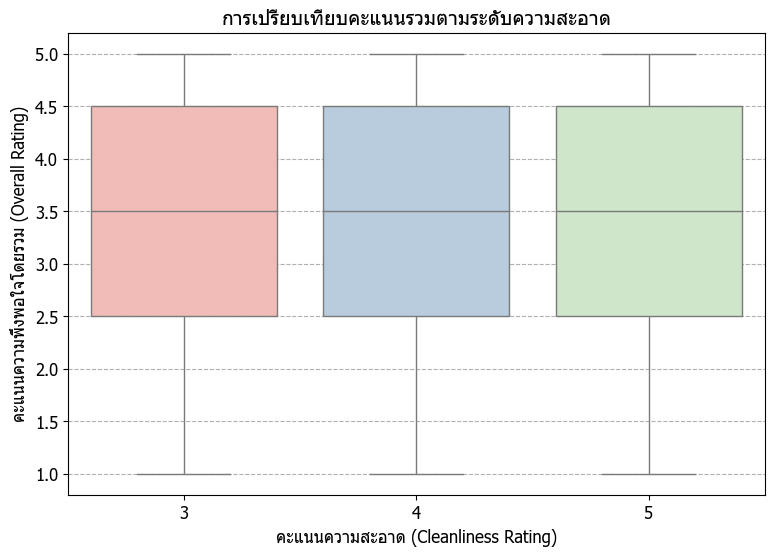

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
# Box Plot แสดงการกระจายตัวของคะแนนรวม (overall_rating)
# ตามระดับคะแนนความสะอาด (Cleanliness)
sns.boxplot(data=df, x='cleanliness', y='overall_rating', palette='Pastel1')
plt.title('การเปรียบเทียบคะแนนรวมตามระดับความสะอาด')
plt.xlabel('คะแนนความสะอาด (Cleanliness Rating)')
plt.ylabel('คะแนนความพึงพอใจโดยรวม (Overall Rating)')
plt.grid(axis='y', linestyle='--')
plt.show()